In [ ]:
!pip install ucimlrepo

# Data Loading and Analysis

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [ ]:
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [ ]:
y.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [ ]:
print("Duplicates in X:", X.duplicated().sum())
print("Duplicates in y:", y.duplicated().sum())

Duplicates in X: 1179
Duplicates in y: 6490


# Preprocessing

In [ ]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Concatenated x and y into variable data
data = pd.concat([X, y], axis=1)

print("Before removing duplicates:", data.shape)
#Dropped the duplicates
data = data.drop_duplicates()

print("After removing duplicates:", data.shape)

print("\nCleaned Data:")
print(data.head())


X_clean = data.drop('quality', axis=1)
y_clean = data['quality']

Before removing duplicates: (6497, 12)
After removing duplicates: (5318, 12)

Cleaned Data:
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.5

In [ ]:
print(X.isnull().sum())

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64


In [ ]:
X_clean.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [ ]:
y_clean.head()

,quality
0,5
1,5
2,5
3,6
5,5


In [ ]:
# Grouped the values as low, medium, high
def map_quality(q):
    if q <= 4:
        return 'Low'
    elif q <= 6:
        return 'Medium'
    else:
        return 'High'

y_grouped = y_clean.apply(map_quality)

print(y_grouped.value_counts())

quality
Medium    4074
High      1008
Low        236
Name: count, dtype: int64


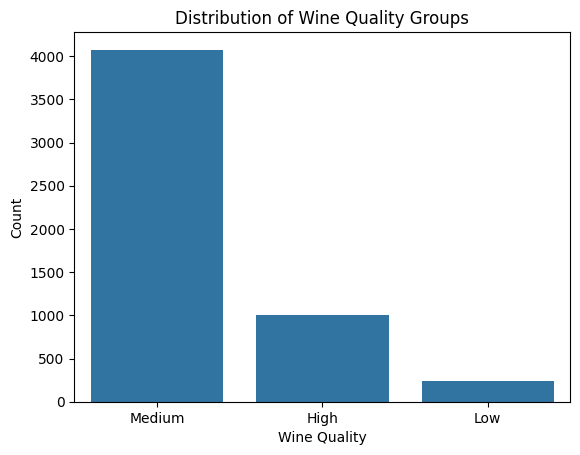

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=y_grouped)
plt.title("Distribution of Wine Quality Groups")
plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.show()

# Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split
# Splitted the data into train,validation and test
X_train, X_temp, y_train, y_temp = train_test_split(
    X_clean, y_grouped, test_size=0.3, random_state=42, stratify=y_grouped)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
print("Train size:", X_train.shape)
print("Validation size:", X_val.shape)
print("Test size:", X_test.shape)

Train size: (3722, 11)
Validation size: (798, 11)
Test size: (798, 11)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree
# trained the model
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Evaluation of dt_model
y_val_pred = dt_model.predict(X_val)

val_acc = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_acc)

cm = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:\n", cm)

print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.7092731829573935
Confusion Matrix:
 [[ 70   2  79]
 [  5   7  23]
 [ 96  27 489]]
              precision    recall  f1-score   support

        High       0.41      0.46      0.43       151
         Low       0.19      0.20      0.20        35
      Medium       0.83      0.80      0.81       612

    accuracy                           0.71       798
   macro avg       0.48      0.49      0.48       798
weighted avg       0.72      0.71      0.71       798



# Handling class imbalance

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Used balanced for class imbalance
dt_model = DecisionTreeClassifier(
    class_weight='balanced',
    random_state=42
)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [ ]:
#Evaluation of dt_model
y_val_pred = dt_model.predict(X_val)
val_acc = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_acc)

cm = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:\n", cm)

print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.7218045112781954
Confusion Matrix:
 [[ 65   3  83]
 [  1   7  27]
 [ 88  20 504]]
              precision    recall  f1-score   support

        High       0.42      0.43      0.43       151
         Low       0.23      0.20      0.22        35
      Medium       0.82      0.82      0.82       612

    accuracy                           0.72       798
   macro avg       0.49      0.48      0.49       798
weighted avg       0.72      0.72      0.72       798



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Handled class imbalance using SMOTE
sm = SMOTE(random_state=42)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

import pandas as pd
print(pd.Series(y_train_res).value_counts())

quality
High      2851
Medium    2851
Low       2851
Name: count, dtype: int64


In [ ]:
#Training the model on oversampled data
dt_model1 = DecisionTreeClassifier(random_state=42)
dt_model1.fit(X_train_res, y_train_res)

DecisionTreeClassifier(random_state=42)

In [ ]:
#Evaluation of dt_model1
y_val_pred = dt_model1.predict(X_val)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.6378446115288221
Confusion Matrix:
 [[ 76   9  66]
 [  2  11  22]
 [128  62 422]]
              precision    recall  f1-score   support

        High       0.37      0.50      0.43       151
         Low       0.13      0.31      0.19        35
      Medium       0.83      0.69      0.75       612

    accuracy                           0.64       798
   macro avg       0.44      0.50      0.46       798
weighted avg       0.71      0.64      0.67       798



# Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
#Tuning the paramters using grid_search
param_grid = {
    'max_depth': [6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=5
)

grid_search.fit(X_train_res, y_train_res)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


# Model training

In [ ]:
#Training the final model on tuned parameters
dt_model_final = DecisionTreeClassifier(
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

dt_model_final.fit(X_train_res, y_train_res)

DecisionTreeClassifier(random_state=42)

# Model Evaluation

In [ ]:
#Evaluation of dt_model_final
y_val_pred = dt_model_final.predict(X_val)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.6378446115288221
Confusion Matrix:
 [[ 76   9  66]
 [  2  11  22]
 [128  62 422]]
              precision    recall  f1-score   support

        High       0.37      0.50      0.43       151
         Low       0.13      0.31      0.19        35
      Medium       0.83      0.69      0.75       612

    accuracy                           0.64       798
   macro avg       0.44      0.50      0.46       798
weighted avg       0.71      0.64      0.67       798



# Feature Importance

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#Finding the features who has most influence on the final model
feature_importances = pd.Series(dt_model_final.feature_importances_, index=X.columns)

feature_importances = feature_importances.sort_values(ascending=False)
print(feature_importances)

alcohol                 0.198379
free_sulfur_dioxide     0.137862
total_sulfur_dioxide    0.123443
volatile_acidity        0.115126
sulphates               0.082556
fixed_acidity           0.076893
residual_sugar          0.067399
chlorides               0.059393
pH                      0.052364
citric_acid             0.048716
density                 0.037867
dtype: float64


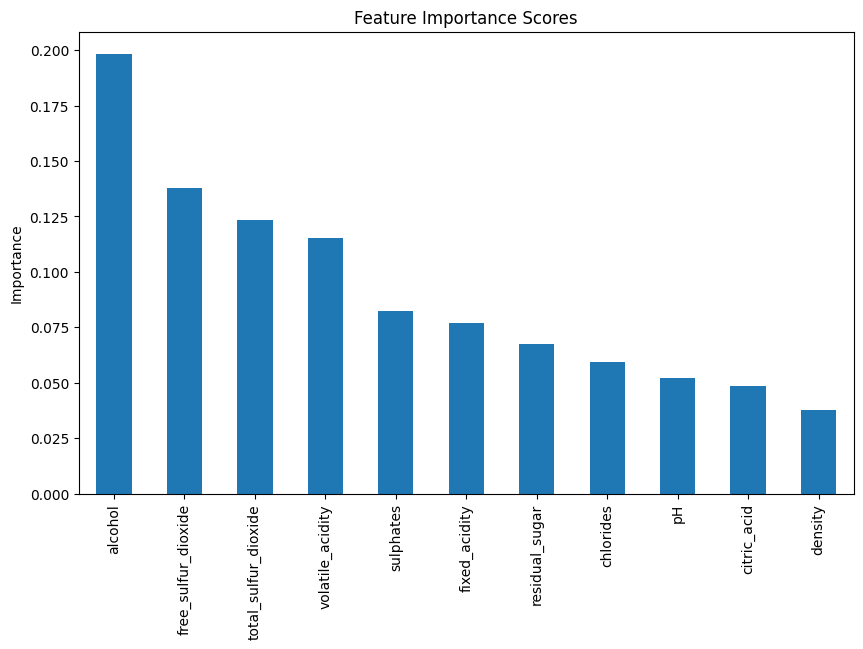

In [ ]:
plt.figure(figsize=(10,6))
feature_importances.plot(kind='bar')
plt.title("Feature Importance Scores")
plt.ylabel("Importance")
plt.show()

# Interpretation

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import export_text
#Tracing the decision path for a single sample
sample_index = 0
sample = X_val.iloc[[sample_index]]
node_indicator = dt_model_final.decision_path(sample)
sample_node_index = node_indicator.indices[node_indicator.indptr[0]:node_indicator.indptr[1]]
feature = X_val.columns
for node_id in sample_node_index:
    if dt_model_final.tree_.feature[node_id] != tree._tree.TREE_UNDEFINED:
        print(
            f"Node {node_id}: (feature {feature[dt_model_final.tree_.feature[node_id]]} <= {dt_model_final.tree_.threshold[node_id]:.2f})"
        )
    else:
        print(f"Node {node_id}: leaf node, value = {dt_model_final.tree_.value[node_id]}")

Node 0: (feature alcohol <= 10.83)
Node 1260: (feature free_sulfur_dioxide <= 19.69)
Node 1261: (feature sulphates <= 0.64)
Node 1262: (feature free_sulfur_dioxide <= 11.71)
Node 1386: (feature volatile_acidity <= 0.60)
Node 1387: (feature fixed_acidity <= 7.26)
Node 1469: (feature total_sulfur_dioxide <= 94.44)
Node 1470: (feature residual_sugar <= 1.80)
Node 1478: (feature chlorides <= 0.03)
Node 1484: (feature fixed_acidity <= 7.39)
Node 1488: (feature free_sulfur_dioxide <= 17.09)
Node 1489: leaf node, value = [[0. 0. 1.]]


# Visualization

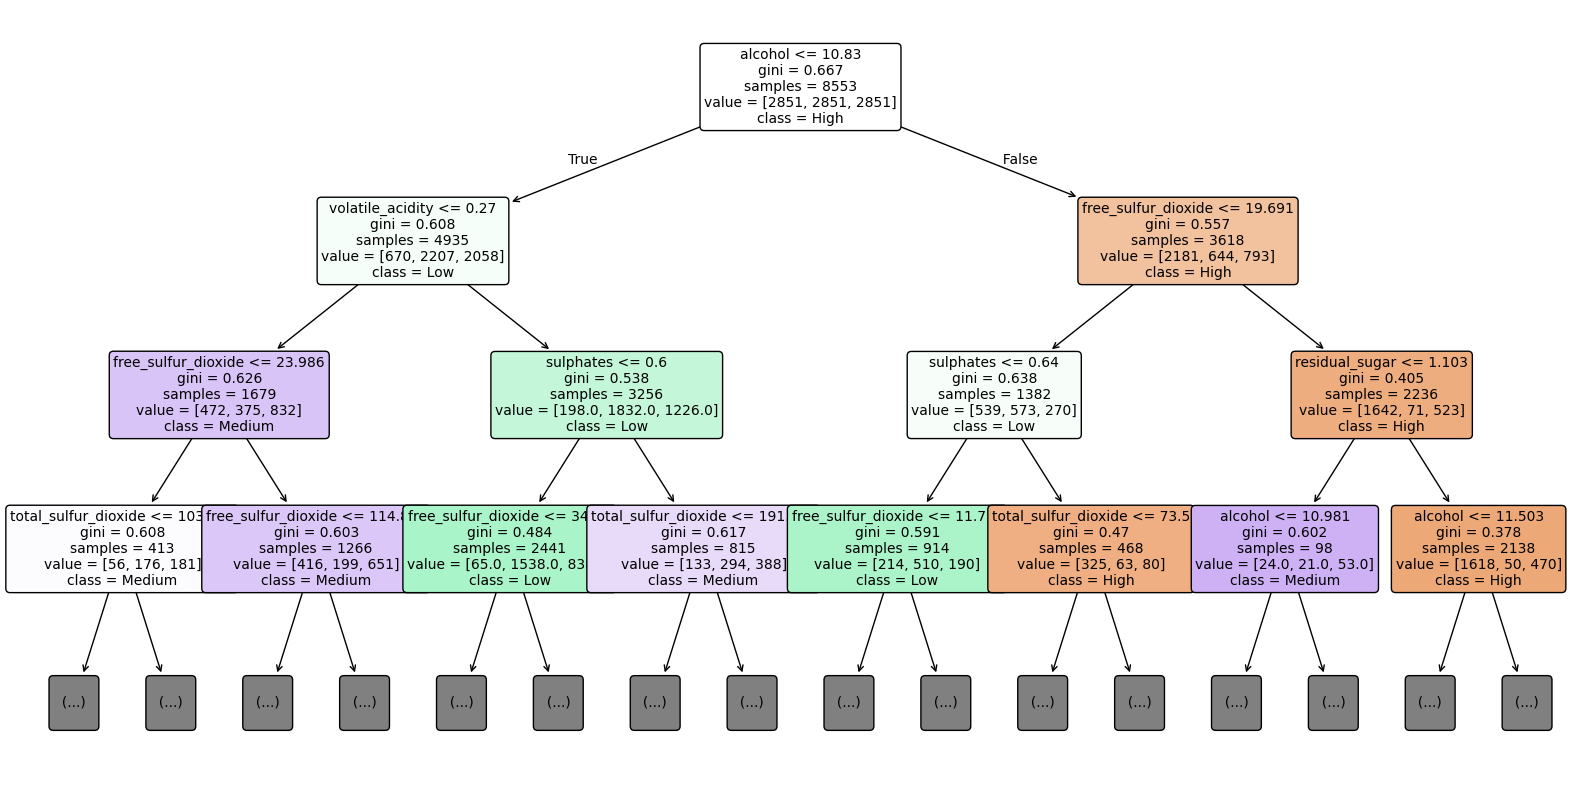

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(
    dt_model_final,
    feature_names=X_val.columns,
    class_names=[str(c) for c in dt_model_final.classes_],
    max_depth=3,
    filled=True,
    fontsize=10,
    rounded=True
)
plt.show()